# QGraphs Data - Creation of digraphs

*This notebook explores creation* ***QGgraphs (Quantum Digraphs)*** *in* ***Networkx**.*

**By:** Jacob Cybulski<br>
**Date:** August 2024<br>
**Aims:** The goal of this notebook is to create random *Quantum Digraphs (QGraphs)*.<br/>
**Networkx technical refs:**
- Web site: https://networkx.org/documentation/stable/index.html
- Tutorial: https://networkx.org/documentation/stable/tutorial.html

In [1]:
import sys
sys.path.append('.')
sys.path

['/home/jacob/miniconda3/envs/pl-cuda12/lib/python311.zip',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11/lib-dynload',
 '',
 '/home/jacob/miniconda3/envs/pl-cuda12/lib/python3.11/site-packages',
 '.']

In [2]:
### General libraries

import matplotlib.pyplot as plt
import matplotlib.patches as pltpat
import pylab
import math
import os
from IPython.display import clear_output

from matplotlib import set_loglevel
set_loglevel("error")

%matplotlib inline

In [3]:
### Get utilities
from utils.Digraphs import * 
from utils.Files import *

## Define log details

In [4]:
### Constants
LOG_NAME = 'logs'
DATA_NAME = 'gen'
DATA_PATH = f'{LOG_NAME}/data'
GRAPH_PATH = f'{LOG_NAME}/graph'
FIGURES_PATH = f'{LOG_NAME}/figures'

### Create a folder if needed
create_folder_if_needed(DATA_PATH)
create_folder_if_needed(GRAPH_PATH)
create_folder_if_needed(FIGURES_PATH)

### Show constants
(LOG_NAME, DATA_NAME, DATA_PATH, GRAPH_PATH, FIGURES_PATH)

('logs', 'gen', 'logs/data', 'logs/graph', 'logs/figures')

## Networkx digraph manipulation

### Digraph generation

In [5]:
from pylab import *
import json
import networkx as nx
from networkx.readwrite import json_graph

In [6]:
### New graph parameters
vers = 11 # Change this value to add new graph, then set to zero for test runs
node_no = 16
edge_p = 0.1

Graph name: digraph_016_025_v011_unw


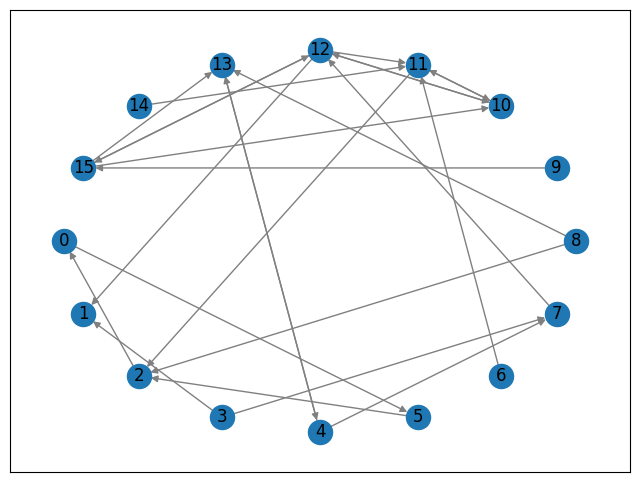

In [7]:
### Create a random graph
g = nx.gnp_random_graph(node_no, edge_p, directed=True)
g_node_no = g.number_of_nodes()
g_edge_no = g.number_of_edges()
unweighted_graph_name = f'digraph_{g_node_no:03d}_{g_edge_no:03d}_v{vers:03d}_unw'
print(f'Graph name: {unweighted_graph_name}')
draw_digraph(g)

### Save the graph

In [8]:
### Saving of a graph to a file
g_path = f'{GRAPH_PATH}/{unweighted_graph_name}.json'
save_digraph(g, g_path)
print(f'Saved graph in file: {g_path}')

Saved graph in file: logs/graph/digraph_016_025_v011_unw.json


In [9]:
digraph_details(g)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 12},
  {'id': 13},
  {'id': 14},
  {'id': 15}],
 'links': [{'source': 0, 'target': 5},
  {'source': 2, 'target': 0},
  {'source': 3, 'target': 1},
  {'source': 3, 'target': 7},
  {'source': 4, 'target': 7},
  {'source': 4, 'target': 13},
  {'source': 5, 'target': 2},
  {'source': 6, 'target': 11},
  {'source': 7, 'target': 12},
  {'source': 8, 'target': 2},
  {'source': 8, 'target': 13},
  {'source': 9, 'target': 15},
  {'source': 10, 'target': 11},
  {'source': 10, 'target': 12},
  {'source': 11, 'target': 2},
  {'source': 11, 'target': 10},
  {'source': 12, 'target': 1},
  {'source': 12, 'target': 10},
  {'source': 12, 'target': 11},
  {'source': 12, 'target': 15},
  {'source': 13, 'target': 4},
  {'source': 14, 'target': 11},
  {'source': 15, 'target': 10}

### Generate a QGraph for modeling

***Creation of a quantum digraph includes three stages:***<br/>
- *Converting an undirected graph to an adjacency matrix*
- *Changing all undirected edges to weighted directed edges*
- *Expanding a digraph to a QGraph (quantum digraph) by adding loops to stop vertices*

Note that on measurement, probabilities of navigation from a vertex to all possible targets adds to 1.

### Continue or load another graph

In [10]:
### Select a graph and load it - either enter graph name or used the previous
# sel_graph_name = f'digraph_064_044_v010_unw' # change and comment the next line
sel_graph_name = f'digraph_{g_node_no:03d}_{g_edge_no:03d}_v{vers:03d}_unw'
sel_graph_name

'digraph_016_025_v011_unw'

In [11]:
### Load the graph
g_path = f'{GRAPH_PATH}/{sel_graph_name}.json'
g_sel = load_digraph(g_path)

g_sel_node_no = g_sel.number_of_nodes()
g_sel_edge_no = g_sel.number_of_edges()
calc_p = g_sel_edge_no / g_sel_node_no**2
print(f'Digraph: name="{sel_graph_name}", node# = {g_sel_node_no}, edge# = {g_sel_edge_no} (calculated p = {np.round(calc_p, 2)})')

Digraph: name="digraph_016_025_v011_unw", node# = 16, edge# = 25 (calculated p = 0.1)


In [12]:
### Define parameters of the graph to be loaded
save_vers = vers # Change this value to add new graph, then set to zero for test runs
save_graph_name = f'digraph_{g_sel_node_no:03d}_{g_sel_edge_no:03d}_v{save_vers:03d}_wei'
print(f'QGraph will be saved as: name="{save_graph_name}"')

QGraph will be saved as: name="digraph_016_025_v011_wei"


Loaded graph from file: logs/graph/digraph_016_025_v011_unw.json


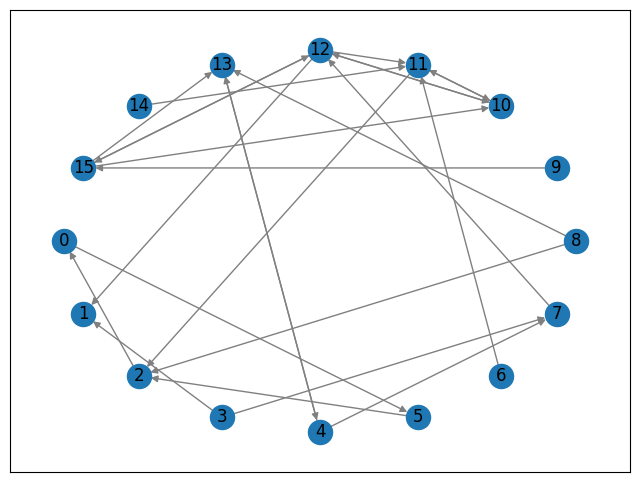

In [13]:
### Draw the selected and loaded graph
draw_digraph(g_sel, rcParams=(8, 6), 
             save_plot=f'{FIGURES_PATH}/{unweighted_graph_name}.eps')
print(f'Loaded graph from file: {g_path}')

### Generate a new QGraph

#### Testing the process step by step and observe results

In [14]:
### Convert a graph to an adjacency matrix
import scipy as sci # Not used as yet
adj_sel = nx.adjacency_matrix(g_sel).toarray() # .todense() # adj_sel.toarray()
adj_sel

/tmp/ipykernel_268292/3329273572.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_sel = nx.adjacency_matrix(g_sel).toarray() # .todense() # adj_sel.toarray()


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]])

In [15]:
### Expand the digraph to eliminate stop vertices (out-degree=0)
adj_exp = digraph_adj_expand(adj_sel)
np.around(adj_exp, 3)

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]])

In [22]:
### Generate edge probability weights (adding to 1.0)
adj_w = digraph_adj_weigh(adj_exp, method='scale') # rand scale
np.around(adj_w, 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.5  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.5  , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.5  , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.  

#### Now let us generate a QGraph in a single step

/home/jacob/Dropbox/Dev/Python/quantum_projects/graphs/utils/Digraphs.py:178: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  g_adj = nx.adjacency_matrix(g).toarray() # todense()


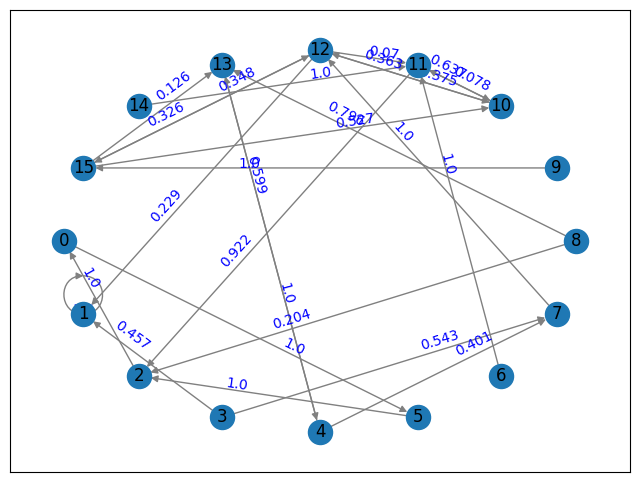

In [17]:
### Test graph generation in one step
g_new = digraph_expanded_and_weighed(g_sel, method='rand') # scale or rand
draw_weighted_digraph(g_new, 'weight', ax=None, 
                      rcParams=(8, 6), save_plot=f'{FIGURES_PATH}/{save_graph_name}.eps')

In [18]:
g_path = f'{GRAPH_PATH}/{save_graph_name}.json'
save_digraph(g_new, g_path)
print(f'Saved graph in file: {g_path}')

Saved graph in file: logs/graph/digraph_016_025_v011_wei.json


In [19]:
digraph_details(g_new)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 8},
  {'id': 9},
  {'id': 10},
  {'id': 11},
  {'id': 12},
  {'id': 13},
  {'id': 14},
  {'id': 15}],
 'links': [{'weight': 1.0, 'source': 0, 'target': 5},
  {'weight': 1.0, 'source': 1, 'target': 1},
  {'weight': 1.0, 'source': 2, 'target': 0},
  {'weight': 0.45699699778175795, 'source': 3, 'target': 1},
  {'weight': 0.5430030022182419, 'source': 3, 'target': 7},
  {'weight': 0.40118645596188407, 'source': 4, 'target': 7},
  {'weight': 0.598813544038116, 'source': 4, 'target': 13},
  {'weight': 1.0, 'source': 5, 'target': 2},
  {'weight': 1.0, 'source': 6, 'target': 11},
  {'weight': 1.0, 'source': 7, 'target': 12},
  {'weight': 0.20382662551202604, 'source': 8, 'target': 2},
  {'weight': 0.7961733744879739, 'source': 8, 'target': 13},
  {'weight': 1.0, 'source': 9, 'target': 15},
  {'weight': 0.636960655317765

## System

In [20]:
!pip list | grep -e torch -e PennyLane -e networkx

networkx                  2.8.8
PennyLane                 0.38.0
PennyLane_Lightning       0.38.0
PennyLane_Lightning_GPU   0.38.0
PennyLane-Rigetti         0.36.0.post0
torch                     2.3.1+cu121
torch_geometric           2.5.3
torchaudio                2.3.1+cu121
torcheval                 0.0.7
torchsummary              1.5.1
torchvision               0.18.1+cu121
